In [1]:
library(tm)
docs <- read.csv("D:\\TEXTproject\\datafiles\\part1.csv", header = FALSE)
#Making it in a corpus.
docs <- VectorSource(docs)
docs <- VCorpus(docs)

Loading required package: NLP


In [2]:
docs <- tm_map(docs,removePunctuation)   
docs <- tm_map(docs, removeNumbers)   
docs <- tm_map(docs, tolower) 
docs <- tm_map(docs, removeWords, stopwords("english"))  
#add custom stopwords in the below vector
docs <- tm_map(docs, removeWords, c())   
docs <- tm_map(docs, stripWhitespace)
docs <- tm_map(docs, PlainTextDocument)
#use when playing,plays,played to single word play 
#docs <- tm_map(docs, stemDocument)

In [3]:
tdm <- TermDocumentMatrix(docs,
                          control = list(removePunctuation = TRUE,
                                         removeNumbers = TRUE,
                                         stopwords = TRUE))

In [4]:
tdm

<<TermDocumentMatrix (terms: 1473, documents: 2)>>
Non-/sparse entries: 1682/1264
Sparsity           : 43%
Maximal term length: 20
Weighting          : term frequency (tf)

In [5]:
tdm <- as.matrix(tdm)

In [17]:
 # change it to a Boolean matrix
 tdm[tdm>=1] <- 1
 # transform into a term-term adjacency matrix
 termMatrix <- tdm %*% t(tdm)
 # inspect terms numbered 5 to 10
 termMatrix[1:100,1:15]

,“herold,able,absolute,academics,acceleration,accelerator,accelerators,accept,accepted,according,accurate,achieve,achieved,achievements,actions
“herold,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1
able,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1
absolute,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1
academics,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1
acceleration,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
accelerator,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1
accelerators,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1
accept,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1
accepted,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1
according,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1


In [10]:
library(igraph)
# build a graph from the above matrix
g <- graph.adjacency(termMatrix, weighted=T, mode = "undirected")
# remove loops
g <- simplify(g)
# set labels and degrees of vertices
V(g)$label <- V(g)$name
V(g)$degree <- degree(g)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



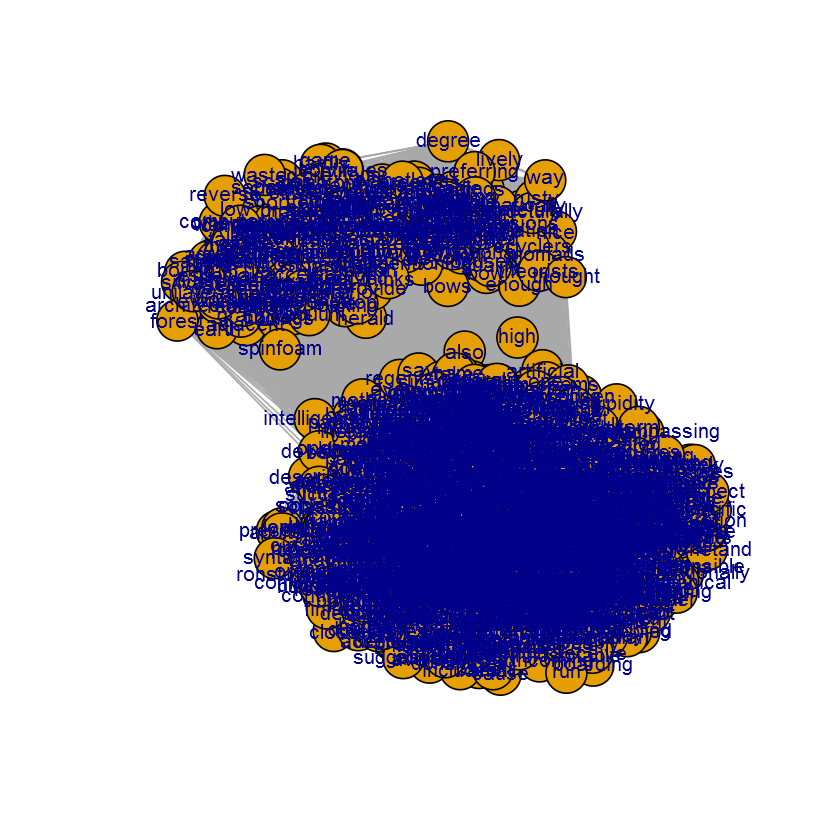

In [11]:
# set seed to make the layout reproducible
set.seed(3952)
layout1 <- layout.fruchterman.reingold(g)
plot(g, layout=layout1)